# Sea Floor Objects

In [46]:
# This will grow and change.
import os
import earthpy as et
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from fiona.drvsupport import supported_drivers
import seaborn as sns

In [47]:
# %load_ext pycodestyle_magic

In [48]:
# Easy pep8 checker
%pycodestyle_on

UsageError: Line magic function `%pycodestyle_on` not found.


In [49]:
# go to /earth-analytics/data directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

# Define the path where this data will be held
dbseabed_kml_pth = os.path.join(
    et.io.HOME, 'earth-analytics', 'data', 'earthpy-downloads',
    'dbS_global.kml')

# Download the google earth KML data from dbSeabed if it hasnt been yet
if not os.path.exists(dbseabed_kml_pth):
    et.data.get_data(
        url=("http://instaar.colorado.edu/~jenkinsc"
             "/dbseabed/kml/dbS_global.kml"))

In [50]:
# Artifical reefs data download

# r = requests.get("https://deq.nc.gov/marine-fisheries/coastal-fishing-"
#                 "information/artificial-reefs/reef-kmz-file/open")


# r = BytesIO(r.content)

In [51]:
# NOTE: Download instructions are in the README for this.
reef_kml_pth = os.path.join(
   et.io.HOME, 'earth-analytics', 'data', 'earthpy-downloads',
   'Reef_Material.kml')

In [52]:
# Get datasets from the Wrecks and Obstructions Database
ENC_wrecks_kml_pth = os.path.join(
    et.io.HOME, 'earth-analytics', 'data', 'earthpy-downloads',
    'ENC_wrecks.kml')
AWOIS_wrecks_kml_pth = os.path.join(
    et.io.HOME, 'earth-analytics', 'data', 'earthpy-downloads',
    'AWOIS_Obstructions.kml')

# Caching
if not os.path.exists(ENC_wrecks_kml_pth):
    et.data.get_data(
        url=("https://wrecks.nauticalcharts.noaa.gov/"
             "downloads/ENC_Wrecks.kml"))
if not os.path.exists(AWOIS_wrecks_kml_pth):
    et.data.get_data(
        url="https://wrecks.nauticalcharts.noaa.gov/"
            "downloads/AWOIS_Obstructions.kml")

In [53]:
# Create Bounding Box - North and South Carolina coastal region
box = {'geometry': [Polygon([(-77.121369, 36.541466),
                             (-70.760165, 40.541466),
                             (-71.511922, 32.087495),
                             (-78.317663, 31.036502)])]}
bbox_gdf = gpd.GeoDataFrame(box, crs='EPSG:4326')
bbox_gdf.bounds

,minx,miny,maxx,maxy
0,-78.317663,31.036502,-70.760165,40.541466


In [54]:
# Read in the KML and trim it to north and south carolina
def read_kml(kml_fp: str):
    """Read in a KML file to a geopandas dataframe.

    Inputs
    -------
    kml_fp: str
        filepath where KML is located
    Outputs:
    --------
    gdf: gpd.GeoDataFrame
    """

    supported_drivers['KML'] = 'rw'
    gdf = gpd.read_file(kml_fp, driver='KML', bbox=bbox_gdf)
    return gdf


# Turn geometry into Lattitude and longitude, create desired format
def create_refined_df(gdf: gpd.GeoDataFrame):
    fgdf = pd.DataFrame(
        columns=['lat', 'lon', 'size', 'description'])
    fgdf['lon'] = gdf.geometry.x
    fgdf['lat'] = gdf.geometry.y
    return fgdf

In [55]:
# ENC Wrecks gdf
ENC_gdf = read_kml(ENC_wrecks_kml_pth)
ENC_gdf

,Name,Description,geometry
0,kml_372,<center><table><tr><th colspan='2' align='cent...,POINT Z (-76.58667 39.21479 0.00000)
1,kml_373,<center><table><tr><th colspan='2' align='cent...,POINT Z (-76.57922 39.21776 0.00000)
2,kml_374,<center><table><tr><th colspan='2' align='cent...,POINT Z (-76.58231 39.20611 0.00000)
3,kml_375,<center><table><tr><th colspan='2' align='cent...,POINT Z (-76.58125 39.21163 0.00000)
4,kml_376,<center><table><tr><th colspan='2' align='cent...,POINT Z (-76.58061 39.18390 0.00000)
...,...,...,...
2490,kml_11365,<center><table><tr><th colspan='2' align='cent...,POINT Z (-77.87813 33.39369 0.00000)
2491,kml_11367,<center><table><tr><th colspan='2' align='cent...,POINT Z (-77.71215 33.40519 0.00000)
2492,kml_11368,<center><table><tr><th colspan='2' align='cent...,POINT Z (-77.87838 33.39383 0.00000)
2493,kml_11369,<center><table><tr><th colspan='2' align='cent...,POINT Z (-77.83111 33.28381 0.00000)


In [56]:
# Convert ENC gdf to refined df
ENC_df = create_refined_df(ENC_gdf)
ENC_df['description'] = 'ENC Wreck'
ENC_df

,lat,lon,size,description
0,39.214793,-76.586673,NaN,ENC Wreck
1,39.217762,-76.579224,NaN,ENC Wreck
2,39.206108,-76.582313,NaN,ENC Wreck
3,39.211635,-76.581251,NaN,ENC Wreck
4,39.183903,-76.580608,NaN,ENC Wreck
...,...,...,...,...
2490,33.393686,-77.878130,NaN,ENC Wreck
2491,33.405189,-77.712152,NaN,ENC Wreck
2492,33.393833,-77.878381,NaN,ENC Wreck
2493,33.283805,-77.831113,NaN,ENC Wreck


<AxesSubplot:>

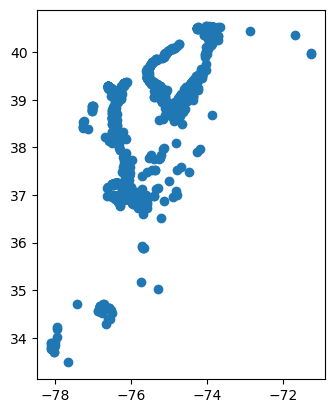

In [57]:
# AWOIS Wrecks gdf
AWOIS_gdf = read_kml(AWOIS_wrecks_kml_pth)
AWOIS_gdf.plot()

In [58]:
# AWOIS df
AWOIS_df = create_refined_df(AWOIS_gdf)
AWOIS_df['description'] = 'AWOIS Obstruction'
AWOIS_df

,lat,lon,size,description
0,38.820889,-76.471694,NaN,AWOIS Obstruction
1,38.823333,-76.439639,NaN,AWOIS Obstruction
2,37.962803,-74.175514,NaN,AWOIS Obstruction
3,39.073181,-76.516556,NaN,AWOIS Obstruction
4,38.093086,-74.811067,NaN,AWOIS Obstruction
...,...,...,...,...
1412,34.525164,-76.511586,NaN,AWOIS Obstruction
1413,34.582386,-76.538256,NaN,AWOIS Obstruction
1414,38.983719,-75.118203,NaN,AWOIS Obstruction
1415,40.042333,-74.986281,NaN,AWOIS Obstruction


In [59]:
# reef material
reef_gdf = read_kml(reef_kml_pth)
reef_gdf

,Name,Description,geometry
0,Granite,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-76.45228 35.09324 0.00000, ..."
1,Granite,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-76.45232 35.09293 0.00000, ..."
2,Granite,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-76.45224 35.09274 0.00000, ..."
3,Granite,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-76.45246 35.09263 0.00000, ..."
4,Granite,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-76.45230 35.09245 0.00000, ..."
...,...,...,...
14339,Marl,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-76.45295 35.09328 0.00000, ..."
14340,Marl,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-76.45294 35.09318 0.00000, ..."
14341,Marl,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-76.45313 35.09353 0.00000, ..."
14342,Marl,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-76.45311 35.09367 0.00000, ..."


In [60]:
# Clip with bounding box coordinates
reef_gdf_clip = gpd.clip(
    reef_gdf, (-78.317663, 31.036502, -70.760165, 40.541466))
reef_gdf_clip

,Name,Description,geometry
13124,Vessel,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","POLYGON Z ((-77.58828 33.48846 0.00000, -77.58..."
13128,Metal,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-77.55629 33.95489 0.00000, ..."
13126,Vessel,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","POLYGON Z ((-77.55744 33.95755 0.00000, -77.55..."
13125,Vessel,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","POLYGON Z ((-77.55716 33.96048 0.00000, -77.55..."
13127,Vessel,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-77.55331 33.96054 0.00000, ..."
...,...,...,...
13280,Reef Balls,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","POLYGON Z ((-75.53094 36.00382 0.00000, -75.53..."
13270,Reef Balls,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","POLYGON Z ((-75.53095 36.00383 0.00000, -75.53..."
13250,Metal,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","POLYGON Z ((-75.53064 36.00386 0.00000, -75.53..."
13248,Metal,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","POLYGON Z ((-75.53092 36.00409 0.00000, -75.53..."


In [61]:
# Create reef dataframe
reef_df = pd.DataFrame(columns=[
    'lat', 'lon', 'size', 'description'])
# Take the first coordinate of the geometry
reef_df['lon'] = reef_gdf_clip.geometry.centroid.x
reef_df['lat'] = reef_gdf_clip.geometry.centroid.y
reef_df['description'] = reef_gdf_clip.Name
# reef_df['geometry'] = str(reef_gdf_clip.geometry)
reef_df

/var/folders/8m/cwkysk5d759d5nwvy056cdxw0000gn/T/ipykernel_21405/957525299.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  reef_df['lon'] = reef_gdf_clip.geometry.centroid.x
/var/folders/8m/cwkysk5d759d5nwvy056cdxw0000gn/T/ipykernel_21405/957525299.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  reef_df['lat'] = reef_gdf_clip.geometry.centroid.y


,lat,lon,size,description
13124,33.488332,-77.588079,NaN,Vessel
13128,33.955444,-77.556013,NaN,Metal
13126,33.957696,-77.557412,NaN,Vessel
13125,33.960443,-77.556884,NaN,Vessel
13127,33.960946,-77.553458,NaN,Vessel
...,...,...,...,...
13280,36.003819,-75.530944,NaN,Reef Balls
13270,36.003820,-75.530944,NaN,Reef Balls
13250,36.003844,-75.530585,NaN,Metal
13248,36.004101,-75.530902,NaN,Metal


In [64]:
# Concatonate the dataframes
total_df = pd.concat([reef_df, AWOIS_df, ENC_df])
total_df

,lat,lon,size,description
13124,33.488332,-77.588079,NaN,Vessel
13128,33.955444,-77.556013,NaN,Metal
13126,33.957696,-77.557412,NaN,Vessel
13125,33.960443,-77.556884,NaN,Vessel
13127,33.960946,-77.553458,NaN,Vessel
...,...,...,...,...
2490,33.393686,-77.878130,NaN,ENC Wreck
2491,33.405189,-77.712152,NaN,ENC Wreck
2492,33.393833,-77.878381,NaN,ENC Wreck
2493,33.283805,-77.831113,NaN,ENC Wreck


In [67]:
# TODO: Figoure out how to plot all these things on top of eachother
# Heat map